# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

spamEmailDataSet_filename = os.path.join(os.getcwd(), "data", "enronSpamSubset.csv")

df = pd.read_csv(spamEmailDataSet_filename, header=0, engine="python")

df.head()
print(df.shape)

(10000, 4)


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classification problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

In [3]:
print("Unique values in Enron spam data set: ", [i for i in df['Label'].unique()])

Unique values in Enron spam data set:  [1, 0]


I chose to use a data set consisting of various emails and their classification as spam or not spam. With this data set, I will be predicting whether an email is spam or not based on its subject line/body content (essentially an email's similarity to previous emails classified as spam). Since the data set has a given label ("Label", which I will change to something like "Is spam" to be more descriptive), I will be solving a supervised learning problem, as I am not guessing what label to predict. The unique values in the label category are 0 or 1, meaning I will be solving a binary classification problem. My current feature list consists of "Body" (which contains email subject lines and their content), "Unnamed: 0.1", and "Unnamed: 0". Lastly, email spam is an occurrence many people may come across in their daily lives. Oftentimes, these spam emails may reach unsuspecting employees at companies of all sizes, seeking to exploit such vulnerabilities to potentially corrupt company devices or the company system or to extract confidential information. In addition, manually deleting spam emails could lead to decreased productivity due to spending time deleting emails and not working, and it could also lead to deleting important emails if not read carefully. While spam filters do exist, malicious attackers are constantly updating and adapting to any cybersecurity efforts, so it is necessary to also update and adapt to their current and existing schemes through using past data. However, it is also essential to be able to predict how threat actors may attempt to exploit others in the future before they are able to even become a threat.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<b>Inspecting Data and Key Statistics</b>

In [4]:
print(df.dtypes)
display(df.describe())

Unnamed: 0.1     int64
Unnamed: 0       int64
Body            object
Label            int64
dtype: object


,Unnamed: 0.1,Unnamed: 0,Label
count,10000.000000,10000.000000,10000.000000
mean,17041.404600,17041.404600,0.500000
std,9735.989695,9735.989695,0.500025
min,8.000000,8.000000,0.000000
25%,8562.000000,8562.000000,0.000000
50%,17159.000000,17159.000000,0.500000
75%,25509.250000,25509.250000,1.000000
max,33698.000000,33698.000000,1.000000


In [5]:
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


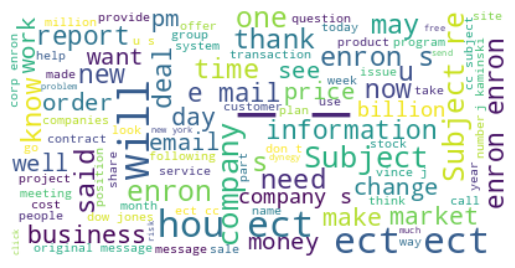

In [6]:
word_cloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['Body'].astype(str)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
for i in range(4):
    print(df['Body'][i])
for i in range(9996, 10000):
    print(df['Body'][i])

Subject: stock promo mover : cwtd
 * * * urgent investor trading alert * * *
 weekly stock pick - - china world trade corp . ( ticker : cwtd )
 * * breaking news * *
 china world trade corp . enters into agreement to acquire
 majority stake in ceo clubs china limited ( the ceo clubs )
 tianhe , guangzhou , china - - ( market wire ) - - apr 7 , 2004 - - china world trade corp
 ( otc bb : cwtd . ob - news ) announced today that it has entered into an agreement to
 acquired majority stake in ceo clubs china limited ( the ceo clubs ) , a hong
 kong corporation with authorized chapter to operate under the ceo clubs
 trademarks in the greater china region , including the prc , hong kong and taiwan .
 china world trade corp .
 symbol : cwtd
 price $ 4 . 80
 shares out : 16 million
 market capitalization : $ 19 million
 significant revenue growth in 2004
 average pe industry : 30 x
 rating : strong buy
 7 days trading target : $ 6 . 50
 30 day trading target : $ 7 . 50
 cwtd is our play of the

<b>Removing Irrelevant Features, Renaming Features and Labels</b>

In [8]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.rename(columns={"Body": "email_content", "Label": "is_spam"}, inplace=True)
df

,email_content,is_spam
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0


<b>Addressing Missingness</b>

In [9]:
df.isnull().sum()

email_content    0
is_spam          0
dtype: int64

In the context of our ML problem, missingness would most likely entail an empty email, which can be an early indication of a potential phishing attack. However, this data set does not contain missing values (all examples contain "Subject: ", with either a subsequent subject line, body of content, or both). In general, emails with empty subject lines but nonempty bodies have potential for spam, and emails with nonempty subject lines but no body also have potential for spam. Using this data set, I should be able to predict whether emails with a missing subject or body would be likely for spam.

<b>Addressing Class Imbalance</b>

In [10]:
df['is_spam'].value_counts()

1    5000
0    5000
Name: is_spam, dtype: int64

In [11]:
print("The Enron spam data set contains", df[df['is_spam'] == 1].shape[0], "positive spam examples")
print("The Enron spam data set contains", df[df['is_spam'] == 0].shape[0], "negative spam examples")

The Enron spam data set contains 5000 positive spam examples
The Enron spam data set contains 5000 negative spam examples


Because the data set contains an equal number of spam vs. not spam examples, class imbalance does not occur, so there is no need to use oversampling or undersampling to adjust the population of spam vs. not spam examples to use for model training.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the email spam data, I removed features "Untitled: 0.1" and "Untitled: 0", since they primarily consisted of integer values that did not contribute to the label. The most important and only remaining feature was "Body" (now "email_content"). To prepare the data for modeling, I will need to utilize data cleaning techniques for textual data such as removing stopwords and punctuation and using tokenization and lemmatization. Using such techniques will convert the data into a format that will be more understandable for the model.

I plan to transform the features into numerical vectors using TFIDF vectorization to train a logistic regression model, a random forest, and hopefully a neural network. For the logistic regression model and random forest, I plan on using default values and Grid Search CV to find optimal hyperparameter values. I plan to analyze these models based on loss, accuracy, and F1 score (which I believe is useful in the case that there are false positives and negatives, even though I have an equal number of positive and negative examples in the original data set). For the neural network, I plan to use Keras to create the model structure. I plan to analyze the network based on loss and accuracy. With this model, I plan to improve the model by testing different values for the number of epochs and possibly adding dropout layers.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_recall_curve, roc_curve

# Neural network
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<b>Data Cleaning and Preprocessing</b>

In [13]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def find_html(text):
    return int("<" and ">" in text)
    
def find_link(text):
    return int("http://" in text)

def num_words(text):
    return len(text)

def find_keywords(text):
    # common spam keywords/phrases
    spam_list = ['100%', '#1', '$$$', '4u', '50% off', 'accept credit cards', 'acceptance', 'access', 'accordingly', 'act now', 'action', 'ad', 'free',
                'offer', 'limited', 'time', 'only', 'discount', 'click', 'buy', 'now', 'order', 'subscribe', 'trial', 'bonus', 'dear', 'friend',
                'amazing', 'deal', 'winner', 'lowest', 'price', 'risk', 'money', 'back', 'guarantee', 'congratulations', 'prize', 'winner', 'congrats',
                'spam', 'spamming']
    for item in spam_list:
        if item in text:
            return int(True)
    return int(False)
    
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [15]:
df['email_content'] = df['email_content'].astype(str)

In [16]:
df['clean_text'] = df['email_content'].apply(clean_text)

In [17]:
df

,email_content,is_spam,clean_text
0,Subject: stock promo mover : cwtd\n * * * urge...,1,subject stock promo mover cwtd urgent investor...
1,Subject: are you listed in major search engine...,1,subject listed major search engine submitting ...
2,"Subject: important information thu , 30 jun 20...",1,subject important information thu jun subject ...
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,subject utf q bask life utf q individual incre...
4,"Subject: "" bidstogo "" is places to go , things...",1,subject bidstogo place go thing hello privacy ...
...,...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0,subject monday nd oct louise half hour free di...
9996,Subject: missing bloomberg deals\n stephanie -...,0,subject missing bloomberg deal stephanie belie...
9997,Subject: eops salary survey questionnaire\n we...,0,subject eops salary survey questionnaire need ...
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0,subject q comparison hi louise comparison firs...


<b>Training Data Setup</b>

In [18]:
X = df['clean_text']
y = df['is_spam']
print(X.shape)
print(y.shape)

(10000,)
(10000,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [20]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

<b>Logistic Regression Implementation</b>

In [84]:
lr_model_default = LogisticRegression(max_iter=1000)
lr_model_default.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [85]:
proba_predictions_default = lr_model_default.predict_proba(X_test_tfidf)[:, 1]
class_label_predictions_default = lr_model_default.predict(X_test_tfidf)
confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])

array([[1478,    7],
       [  58, 1457]])

In [86]:
lr_param_grid = {'C': [10**i for i in range(-5,5)]}
model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, lr_param_grid, cv=5)
grid_search = grid.fit(X_train_tfidf, y_train)

In [87]:
best_C = grid_search.best_estimator_.C
print('Best value for C: {0}'.format(best_C))

Best value for C: 1000


In [88]:
lr_model_best = LogisticRegression(C=best_C, max_iter=1000)
lr_model_best.fit(X_train_tfidf, y_train)

LogisticRegression(C=1000, max_iter=1000)

In [89]:
proba_predictions_best = lr_model_best.predict_proba(X_test_tfidf)[:, 1]
class_label_predictions_best = lr_model_best.predict(X_test_tfidf)
confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

array([[1472,   13],
       [  37, 1478]])

In [90]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

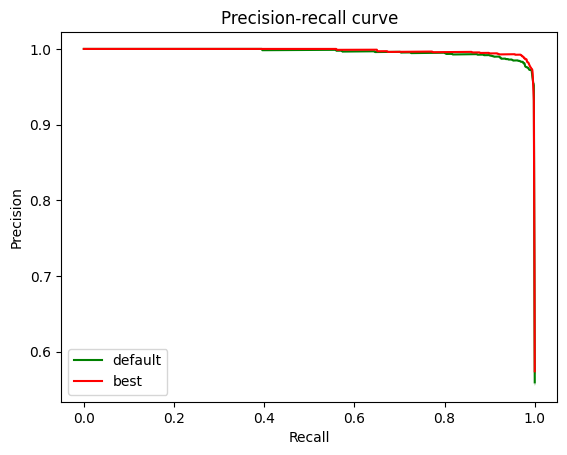

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, color='green', label='default')
sns.lineplot(x=recall_best, y=precision_best, color='red', label='best')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [92]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

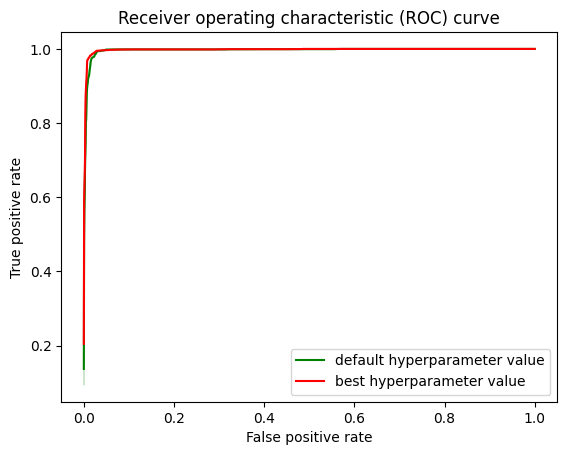

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_default, y=tpr_default, color='green', label='default hyperparameter value')
sns.lineplot(x=fpr_best, y=tpr_best, color='red', label='best hyperparameter value')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [34]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print("AUC default hyperparameters:", auc_default)
print("AUC best hyperparameters:", auc_best)

AUC default hyperparameters: 0.9964209754308765
AUC best hyperparameters: 0.9975868697980909


In [31]:
acc_score_default = accuracy_score(y_test, class_label_predictions_default)
acc_score_best = accuracy_score(y_test, class_label_predictions_best)
print("Accuracy of default hyperparameters:", acc_score_default)
print("Accuracy of best hyperparameters:", acc_score_best)

Accuracy of default hyperparameters: 0.9783333333333334
Accuracy of best hyperparameters: 0.9833333333333333


<b>Random Forest Implementation</b>

In [42]:
rf_model = RandomForestClassifier(max_depth = 32, n_estimators=300)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=32, n_estimators=300)

In [43]:
proba_predictions_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]
class_label_predictions_rf = rf_model.predict(X_test_tfidf)
confusion_matrix(y_test, class_label_predictions_rf, labels=[True, False])

array([[1478,    7],
       [  96, 1419]])

In [44]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, proba_predictions_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, proba_predictions_rf)

In [45]:
auc_rf = auc(fpr_rf, tpr_rf)
print("AUC best hyperparameters:", auc_rf)
acc_score_rf = accuracy_score(y_test, class_label_predictions_rf)
print("Accuracy of random forest hyperparameters:", acc_score_rf)

AUC best hyperparameters: 0.9965645453434232
Accuracy of random forest hyperparameters: 0.9656666666666667


In [102]:
rf_alt = RandomForestClassifier(max_depth=64, n_estimators=1000)
rf_alt.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=64, n_estimators=1000)

In [103]:
proba_predictions_rf = rf_alt.predict_proba(X_test_tfidf)[:, 1]
class_label_predictions_rf = rf_alt.predict(X_test_tfidf)
print(confusion_matrix(y_test, class_label_predictions_rf, labels=[True, False]))
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, proba_predictions_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, proba_predictions_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print("AUC best hyperparameters:", auc_rf)
acc_score_rf = accuracy_score(y_test, class_label_predictions_rf)
print("Accuracy of random forest hyperparameters:", acc_score_rf)

[[1476    9]
 [  74 1441]]
AUC best hyperparameters: 0.9970674845262305
Accuracy of random forest hyperparameters: 0.9723333333333334


I originally planned to use GridSearchCV, but due to time constraints and the search taking too long, I opted to compare two different random forest ensembles. By increasing the number of n_estimators, this increased the amount of time needed to train the model, but it allowed the model to learn the data better, thus increasing the prediction accuracy of the random forest.

<b>Neural Network Implementation</b>

In [24]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
vocabulary_size

61275

In [40]:
# 1. Create model object
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,), name='input')
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=32, activation='relu', name='hl_1')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.30))

hidden_layer_2 = keras.layers.Dense(units=16, activation='relu', name='hl_2')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.30))

hidden_layer_3 = keras.layers.Dense(units=8, activation='relu', name='hl_3')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.30))

output_layer = keras.layers.Dense(units=1, activation='sigmoid', name='output')
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl_1 (Dense)                 (None, 32)                1960832   
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 8)                 136       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
output (Dense)               (None, 1)                

In [42]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [37]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [43]:
t0 = time.time() # start time

num_epochs = 20 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2,
                       callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 20], Loss: 0.2563, Accuracy: 0.9111, Val_loss: 0.2346, Val_accuracy: 0.9050
Epoch [10/ 20], Loss: 0.0738, Accuracy: 0.9746, Val_loss: 0.0555, Val_accuracy: 0.9857
Epoch [15/ 20], Loss: 0.1111, Accuracy: 0.9655, Val_loss: 0.0961, Val_accuracy: 0.9643
Epoch [20/ 20], Loss: 0.0605, Accuracy: 0.9793, Val_loss: 0.0639, Val_accuracy: 0.9843
Elapsed time: 16.77s


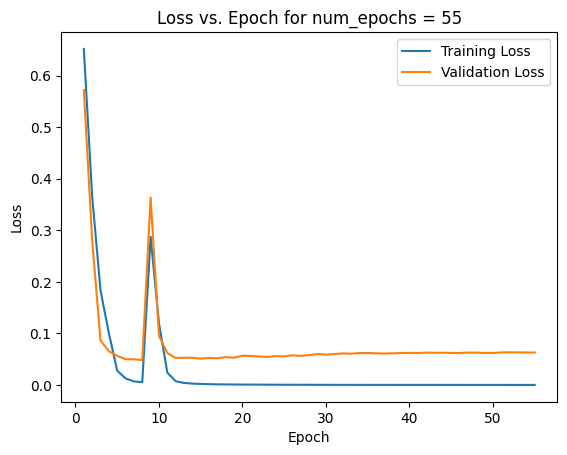

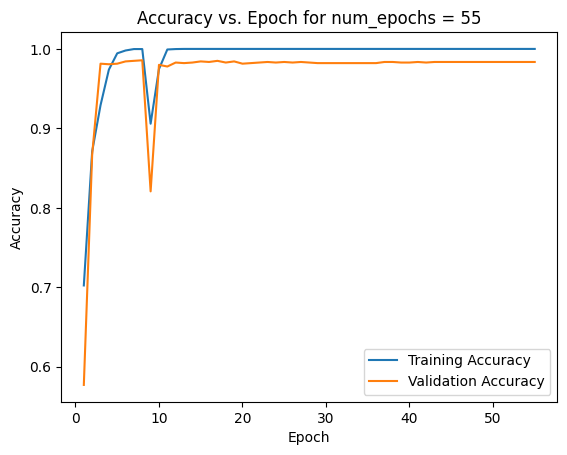

In [52]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.title('Loss vs. Epoch for num_epochs = 55')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Accuracy vs. Epoch for num_epochs = 55')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

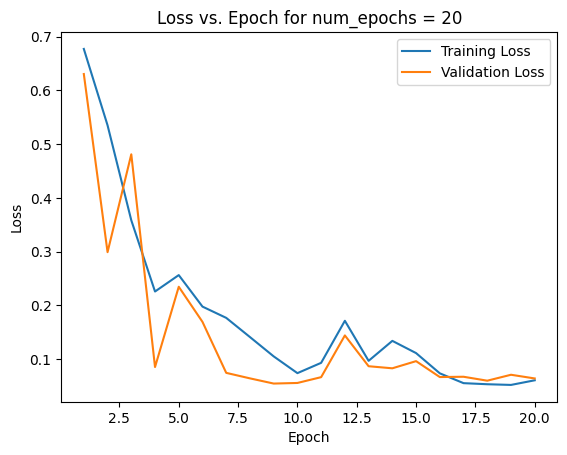

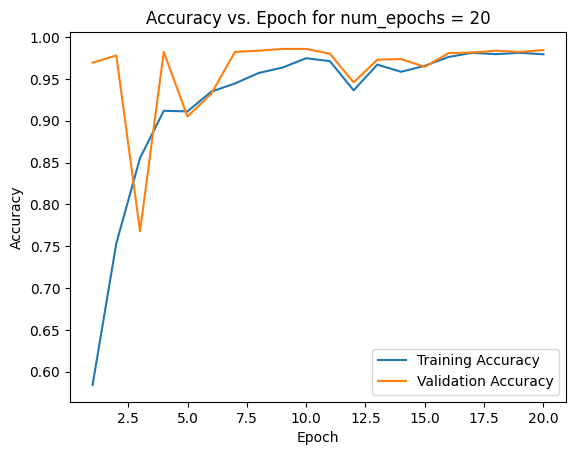

In [44]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.title('Loss vs. Epoch for num_epochs = 20')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Accuracy vs. Epoch for num_epochs = 20')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

To minimize the differences in training and validation losses and accuracies, I experimented with adding dropout layers (with a fraction value of 0.30) and adjusting the number of epochs. 55 epochs resulted in overfitting, where the losses differed by about 0.1, and the accuracies differed about 0.01. The training values were higher than that of the validation data, meaning the model performed better on training data than validation data, hinting at overfitting.

<b>Conclusion</b>

Currently, I have only compared accuracy scores between the three types of models. Based on that alone, the logistic regression and neural network models seemed to be the best performing compared to the random forest. However, taking into consideration the resources needed to train the model, I believe using the logistic regression model would be the best model to utilize, since it is effective in solving our ML problem without using a relatively higher amount of resources such as neural networks.